#### Import librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
# Load the datasets
train_df = pd.read_csv('train.csv')
print("Training dataset loaded successfully.")
test_df = pd.read_csv('test.csv')
print("Test dataset loaded successfully.")

Training dataset loaded successfully.
Test dataset loaded successfully.


In [ ]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
# Display basic information about the dataset
print("\nTraining Data Info:")
train_df.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

In [ ]:
print("\nTraining Data Description:")
print(train_df.describe().T)


Training Data Description:
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtS

In [ ]:
# Check for missing values
print("\nChecking for missing values:")
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("\nFeatures with missing values:")
print(missing_values)


Checking for missing values:

Features with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64



Visualizing missing values...


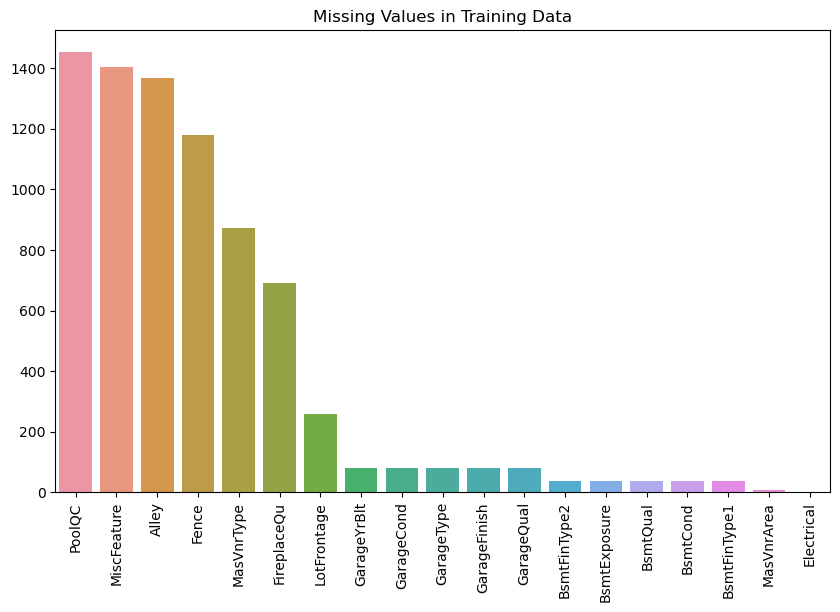

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Training Data')
plt.show()

In [ ]:
# Handling missing values (example: filling missing values with median or mode)
print("\nHandling missing values")
for column in missing_values.index:
    if train_df[column].dtype == 'object':
        print(f"Filling missing values in column '{column}' with mode.")
        train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    else:
        print(f"Filling missing values in column '{column}' with median.")
        train_df[column].fillna(train_df[column].median(), inplace=True)


Handling missing values
Filling missing values in column 'PoolQC' with mode.
Filling missing values in column 'MiscFeature' with mode.
Filling missing values in column 'Alley' with mode.
Filling missing values in column 'Fence' with mode.
Filling missing values in column 'MasVnrType' with mode.
Filling missing values in column 'FireplaceQu' with mode.
Filling missing values in column 'LotFrontage' with median.
Filling missing values in column 'GarageYrBlt' with median.
Filling missing values in column 'GarageCond' with mode.
Filling missing values in column 'GarageType' with mode.
Filling missing values in column 'GarageFinish' with mode.
Filling missing values in column 'GarageQual' with mode.
Filling missing values in column 'BsmtFinType2' with mode.
Filling missing values in column 'BsmtExposure' with mode.
Filling missing values in column 'BsmtQual' with mode.
Filling missing values in column 'BsmtCond' with mode.
Filling missing values in column 'BsmtFinType1' with mode.
Filling 


Checking for outliers in numerical features
Plotting boxplot for feature 'Id
Plotting boxplot for feature 'MSSubClass
Plotting boxplot for feature 'LotFrontage
Plotting boxplot for feature 'LotArea
Plotting boxplot for feature 'OverallQual
Plotting boxplot for feature 'OverallCond
Plotting boxplot for feature 'YearBuilt
Plotting boxplot for feature 'YearRemodAdd
Plotting boxplot for feature 'MasVnrArea
Plotting boxplot for feature 'BsmtFinSF1


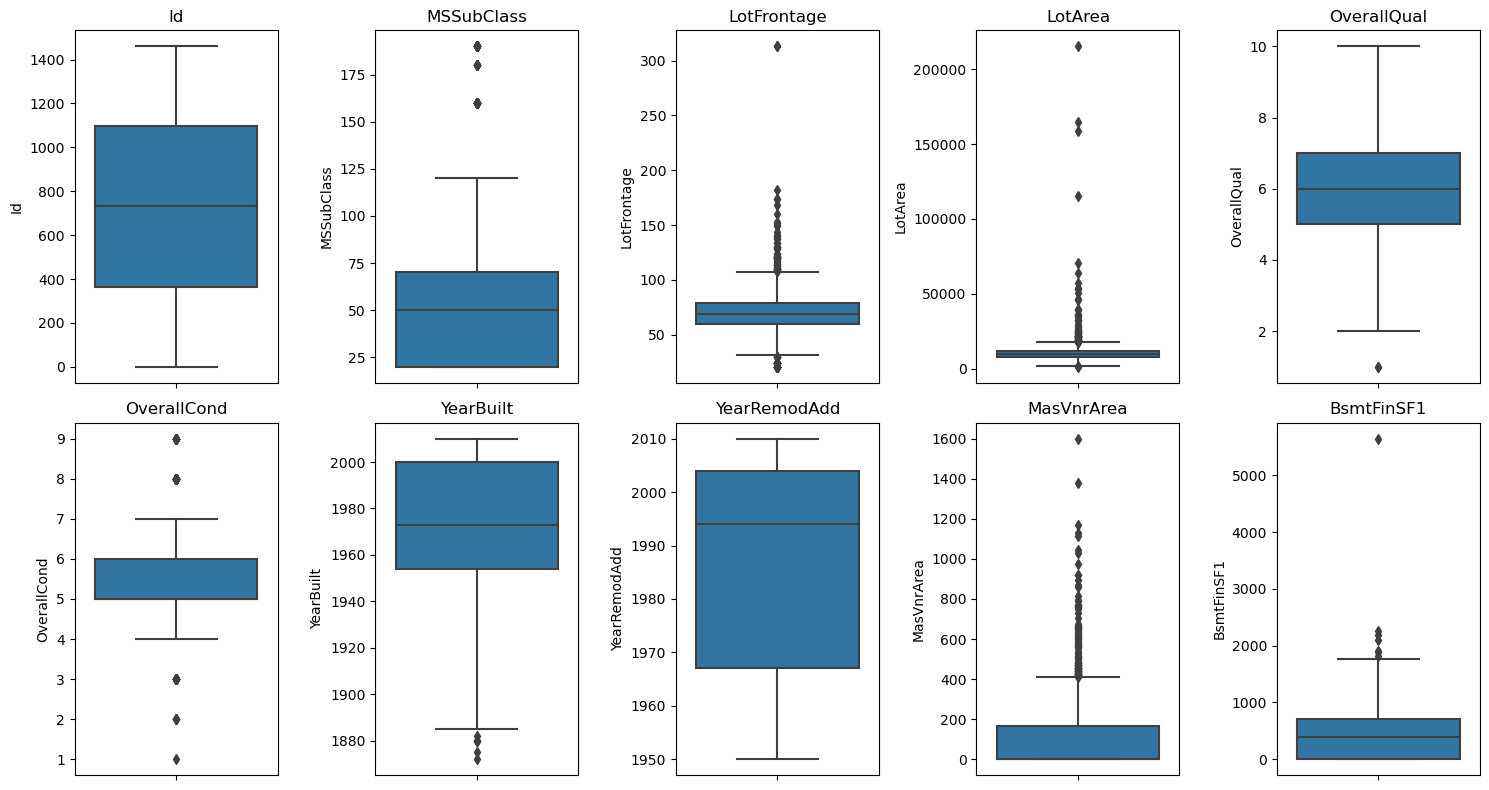

In [ ]:
# Checking for outliers using boxplots for numerical features
print("\nChecking for outliers in numerical features")
numerical_features = train_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features[:10]):  # Plot first 10 numerical features
    print(f"Plotting boxplot for feature '{feature}")
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=train_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

### Data preprocessing 

In [ ]:
# Removing outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(train_df[numerical_features]))
outlier_mask = (z_scores < 3).all(axis=1)  # Removing data points where any feature has z-score > 3
train_df = train_df[outlier_mask]
print(f"Data shape after removing outliers: {train_df.shape}")

Data shape after removing outliers: (1015, 81)


#### Feature engineering

In [ ]:
# Create a new feature 'HouseAge' - difference between year sold and year built
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Create a new feature 'RemodAddAge' - difference between year sold and year remodele
train_df['RemodAddAge'] = train_df['YrSold'] - train_df['YearRemodAdd']

In [ ]:
# Create a new feature 'TotalBathrooms' - sum of full and half bathrooms above and below grade
train_df['TotalBathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) +
                               train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))

# Create a new feature 'TotalSF' - total square feet (basement, first and second floors)
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

# Create a new feature 'HasGarage' - feature indicating if a house has a garage or not
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Define target variable and features
target = 'SalePrice'
features = train_df.drop(columns=['SalePrice', 'Id'])

In [ ]:
# Ordinal Encoding for categorical features
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
features[categorical_features] = ordinal_encoder.fit_transform(features[categorical_features])

In [ ]:
# Separate numerical features
numerical_features = features.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])

In [ ]:
# Split the data into training and validation sets
X = features
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Pipeline for Random Forest Regressor

In [ ]:
rf_reg_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Evaluate Random Forest Regressor Model
y_pred_rf = rf_reg_pipeline.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"Random Forest Regressor RMSE: {rmse_rf}")
print(f"Random Forest Regressor MAE: {mae_rf}")
print(f"Random Forest Regressor R2 score: {r2_rf}")

Random Forest Regressor RMSE: 18725.637761367812
Random Forest Regressor MAE: 13738.433743842366
Random Forest Regressor R2 score: 0.9126092954582841


#### Random forest model score
    - Random Forest RMSE: $18.725
    - Random Forest Mean Absolute Erro: $13738
    - Random Forest R2 score: 91.26%

##### We can see that that the radomn forest model performs well with a R2 score of more than 90%


In [ ]:
# Cross-Validation for Random Forest Regressor
cross_val_scores = cross_val_score(rf_reg_pipeline, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-cross_val_scores)
print(f"Cross-Validation RMSE for Random Forest Regressor: {rmse_cv.mean()} (std: {rmse_cv.std()})")

Cross-Validation RMSE for Random Forest Regressor: 20477.404152163836 (std: 1708.5650048932525)


#### The cross validation RMSE is $20.477 while the standard deviation is $1708 which is relatively low.

#### Hyperparameter Tuning for Random Forest Regressor

In [ ]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# initialize the pipeline
rf_reg_pipeline = Pipeline(steps=[('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Gridsearch 
grid_search = GridSearchCV(rf_reg_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best parameters and score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best RMSE found by GridSearchCV:")
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE: {best_rmse}")

Best parameters found by GridSearchCV:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best RMSE found by GridSearchCV:
Best RMSE: 21631.995121905115


##### Best hyperparameters found by GridSearchCV:
    - n_estimators': 100
    - max_depth': None
    -  min_samples_leaf': 1
    - min_samples_split': 2 

##### Evaluate the best Random Forest model on the validation set

In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_val)
rmse_rf_best = np.sqrt(mean_squared_error(y_val, y_pred_rf_best))
r2_rf_best = r2_score(y_val, y_pred_rf_best)
print(f"Best Random Forest Regressor RMSE on validation set: {rmse_rf_best}")
print(f"Best Random Forest Regressor R2 score on validation set: {r2_rf_best}")

Best Random Forest Regressor RMSE on validation set: 18725.637761367812
Best Random Forest Regressor R2 score on validation set: 0.9126092954582841


##### Feature Importance Analysis

In [ ]:
# 10 most important features 
importances = best_rf_model.named_steps['model'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False).head(10)
print(feature_importance_df.head(10))

           Feature  Importance
82         TotalSF    0.560642
16     OverallQual    0.144616
18       YearBuilt    0.033930
79        HouseAge    0.032567
29        BsmtQual    0.030436
48        FullBath    0.019753
45       GrLivArea    0.017117
81  TotalBathrooms    0.015654
61      GarageArea    0.013633
33      BsmtFinSF1    0.012853


##### The 10 most important features are as follows in %: 
    
- TotalSF: 0.406657
- OverallQual: 0.358296
- 2ndFlrSF: 0.025523
- YearBuilt: 0.013834
- HouseAge: 0.012161
- LotArea: 0.012069
- BsmtFinSF1: 0.010926
- GrLivArea: 0.010836
- TotalBathrooms: 0.010424
- GarageCars: 0.009943

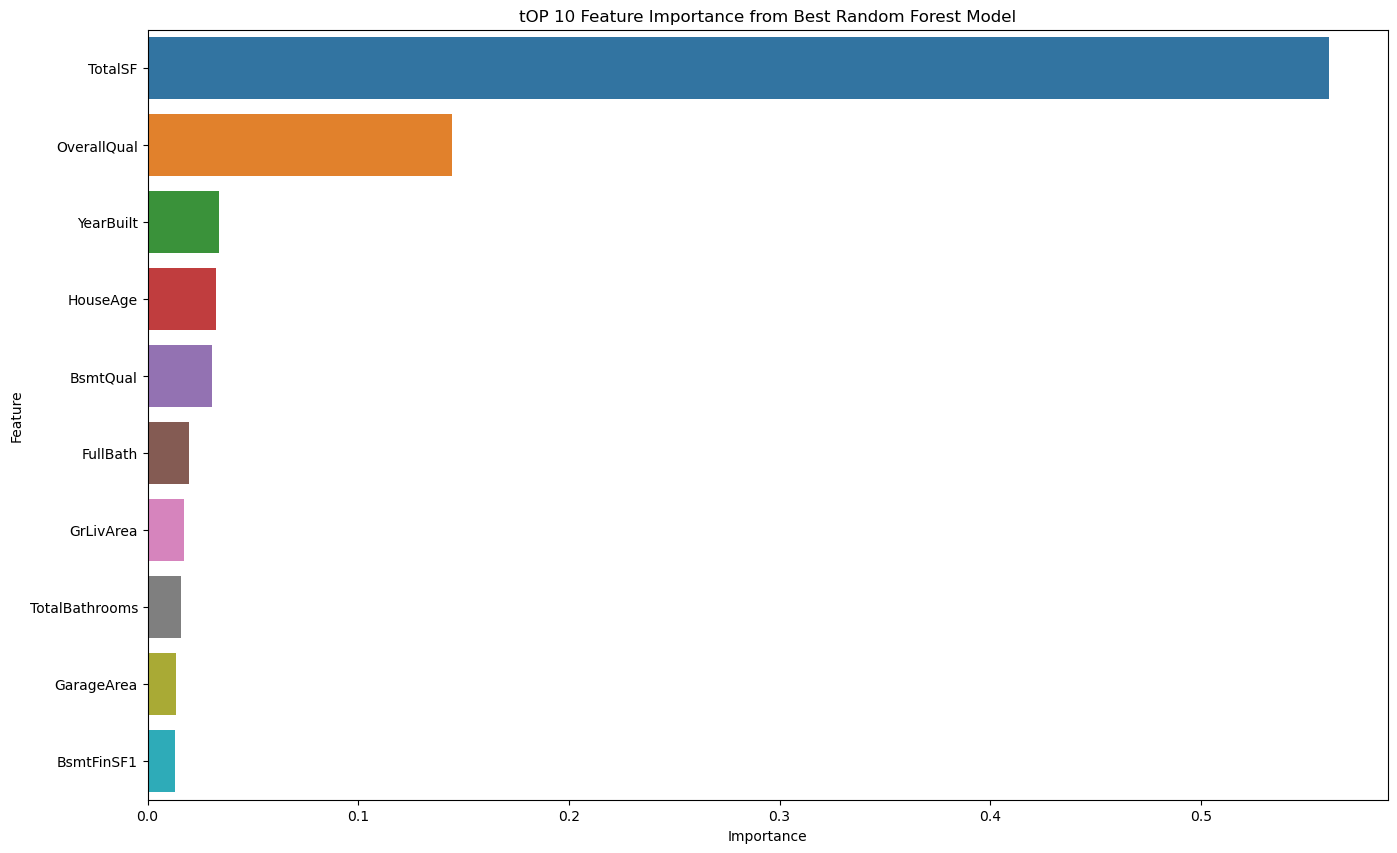

In [ ]:
# Plot features importance
plt.figure(figsize=(16, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('tOP 10 Feature Importance from Best Random Forest Model')
plt.show()

### Model Gradient Boosting Regressor

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=42) # hyperparmeters by GridSearch
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
# fit X_train and y_train using GridSearch 
gb_grid_search = GridSearchCV(gb_reg, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best parameters and score for Gradient Boosting Regressor
print("Best parameters found by GridSearchCV for Gradient Boosting Regressor:")
print(gb_grid_search.best_params_)

Best parameters found by GridSearchCV for Gradient Boosting Regressor:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


#### The best hyperparameters found by the GridSearch for Gradient boosting regressor are: 
    - learning_rate: 0.1, 
    - max_depth: 3, 
    - n_estimators: 200

In [ ]:
best_rmse_gb = np.sqrt(-gb_grid_search.best_score_)
print(f"Best RMSE for Gradient Boosting: {best_rmse_gb}")

Best RMSE for Gradient Boosting: 19698.012649830445


#### Evaluate the best Gradient Boosting model on the validation set

In [ ]:
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb_best = best_gb_model.predict(X_val)
rmse_gb_best = np.sqrt(mean_squared_error(y_val, y_pred_gb_best))
r2_gb_best = r2_score(y_val, y_pred_gb_best)
mae_gb_best = mean_absolute_error(y_val, y_pred_gb_best)
print(f"Best Gradient Boosting Regressor RMSE on validation set: {rmse_gb_best}")
print(f"Best Gradient Boosting Regressor R2 score on validation set: {r2_gb_best}")
print(f"Best Gradient Boosting Regressor Mean absolute error on validation set: {mae_gb_best}")

Best Gradient Boosting Regressor RMSE on validation set: 18286.33220057829
Best Gradient Boosting Regressor R2 score on validation set: 0.9166615890846882
Best Gradient Boosting Regressor Mean absolute error on validation set: 12641.36221892007


#### The gradient boosting model after running the model on the best estimators the result are as follows: 
    - RMSE: $ 18.286 (better than random forest model)
    - R2 score: 91.66% 
    - Mean absolute error: $12.641
#### The gradient boosting model has a slightly better performance than the other random forest model with the same R2 score. The RMSE has improved from the random forest and the Mean absolute error has decreased to $12.641 which is a good sign of improvement


#### Model XGBoost Regressor

In [ ]:
import xgboost as xgb

In [ ]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
# fit X_train and y_train on XGBoost regressor model with GridSearch
xgb_grid_search = GridSearchCV(xgb_reg, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best parameters and score for XGBoost Regressor
print("Best parameters found by GridSearchCV for XGBoost Regressor:")
print(xgb_grid_search.best_params_)
print("Best RMSE found by GridSearchCV for XGBoost Regressor:")
best_rmse_xgb = np.sqrt(-xgb_grid_search.best_score_)
print(f"Best RMSE for XGBoost: {best_rmse_xgb}")

Best parameters found by GridSearchCV for XGBoost Regressor:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best RMSE found by GridSearchCV for XGBoost Regressor:
Best RMSE for XGBoost: 20120.94127375152


#### The XGBoost and the Gradient boosting models seems to have the same hyperparameters. 
    - Best parameters found by GridSearchCV for XGBoost Regressor:
    - learning_rate: 0.1, 
    - max_depth': 3, 
    - 'n_estimators': 300


In [ ]:
# Evaluate the best XGBoost model on the validation set
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_val)
rmse_xgb_best = np.sqrt(mean_squared_error(y_val, y_pred_xgb_best))
r2_xgb_best = r2_score(y_val, y_pred_xgb_best)
mae_xgb_best = mean_absolute_error(y_val, y_pred_xgb_best)
print(f"Best XGBoost Regressor RMSE on validation set: {rmse_xgb_best}")
print(f"Best XGBoost Regressor R2 score on validation set: {r2_xgb_best}")
print(f"Best XGBoost Regressor Mean absolute error on validation set: {mae_xgb_best}")

Best XGBoost Regressor RMSE on validation set: 17594.024822726093
Best XGBoost Regressor R2 score on validation set: 0.9228524025777043
Best XGBoost Regressor Mean absolute error on validation set: 12568.119554341132


#### The XGBoost has the best performance from all two previous models. Here are the evaluation metrics: 
    - RMSE: $17.594 best overall performace 
    - R2: 92.28% best overall performance
    - Mean absolute error: $12.568 best overall performance


# Evaluate the best models on the test set

### Feature engineering on test dataset

In [ ]:
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['RemodAddAge'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['TotalBathrooms'] = (test_df['FullBath'] + (0.5 * test_df['HalfBath']) +
                              test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']))
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['HasGarage'] = test_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#### Handle missing values in test dataset

In [ ]:
for column in test_df.columns:
    if test_df[column].isnull().sum() > 0:
        if test_df[column].dtype == 'object':
            test_df[column].fillna(test_df[column].mode()[0], inplace=True)
        else:
            test_df[column].fillna(test_df[column].median(), inplace=True)

#### Ensure test features have the same columns as training features 

In [ ]:
test_features = test_df.reindex(columns=features.columns, fill_value=0)

#### Encode categorical features in the test dataset

In [ ]:
for column in categorical_features:
    if column in test_features.columns:
        test_features[column] = test_features[column].fillna(train_df[column].mode()[0])

for column in categorical_features:
    if column in test_features.columns:
        test_features[column] = test_features[column].astype(str).fillna(train_df[column].mode()[0])

In [ ]:
test_features[categorical_features] = ordinal_encoder.transform(test_features[categorical_features])

##### Normalize numerical features in the test dataset

In [ ]:
test_features[numerical_features] = scaler.transform(test_features[numerical_features])

### Predictions for Random Forest Regressor Model on Test Set

In [ ]:
# Ensure Random Forest model is fitted before predicting
if not hasattr(rf_reg_pipeline, 'steps') or not hasattr(rf_reg_pipeline.named_steps['model'], 'n_features_in_'):
    rf_reg_pipeline.fit(X_train, y_train)

In [ ]:
y_test_pred_rf = rf_reg_pipeline.predict(test_features)
print("Random Forest Regressor Predictions on Test Set:")
print(y_test_pred_rf)

Random Forest Regressor Predictions on Test Set:
[121948.5  154254.75 182916.6  ... 145019.84 115780.75 229238.85]


#### Predict using the best Gradient Boosting model

In [ ]:
y_test_pred_gb = best_gb_model.predict(test_features)
print("Gradient Boosting Regressor Predictions on Test Set is:")
print(y_test_pred_gb)

Gradient Boosting Regressor Predictions on Test Set is:
[128683.25503915 159182.43291434 183329.63351499 ... 142531.44357172
 118700.70780798 232374.63964974]


In [ ]:
# Feature Importance Analysis for Random Forest
importances_rf = best_rf_model.named_steps['model'].feature_importances_
feature_importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False).head(15)

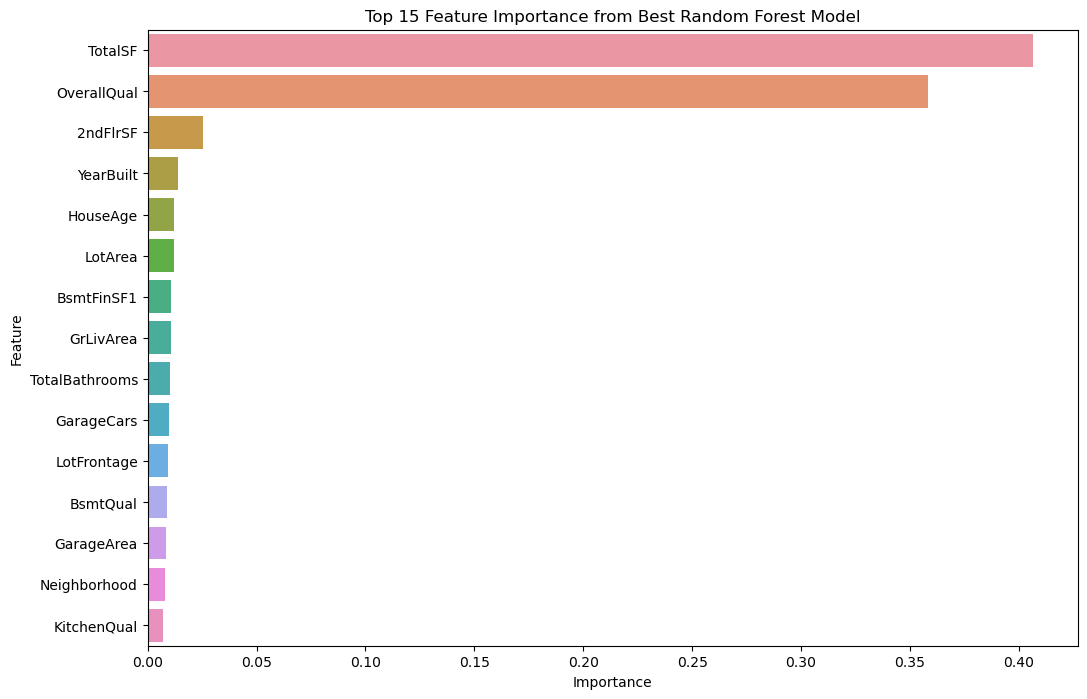

In [ ]:
# Plot feature importance for Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df)
plt.title('Top 15 Feature Importance from Best Random Forest Model')
plt.show()

In [ ]:
# Feature Importance Analysis for Gradient Boosting
importances_gb = best_gb_model.feature_importances_
feature_importance_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_gb}).sort_values(by='Importance', ascending=False).head(15)

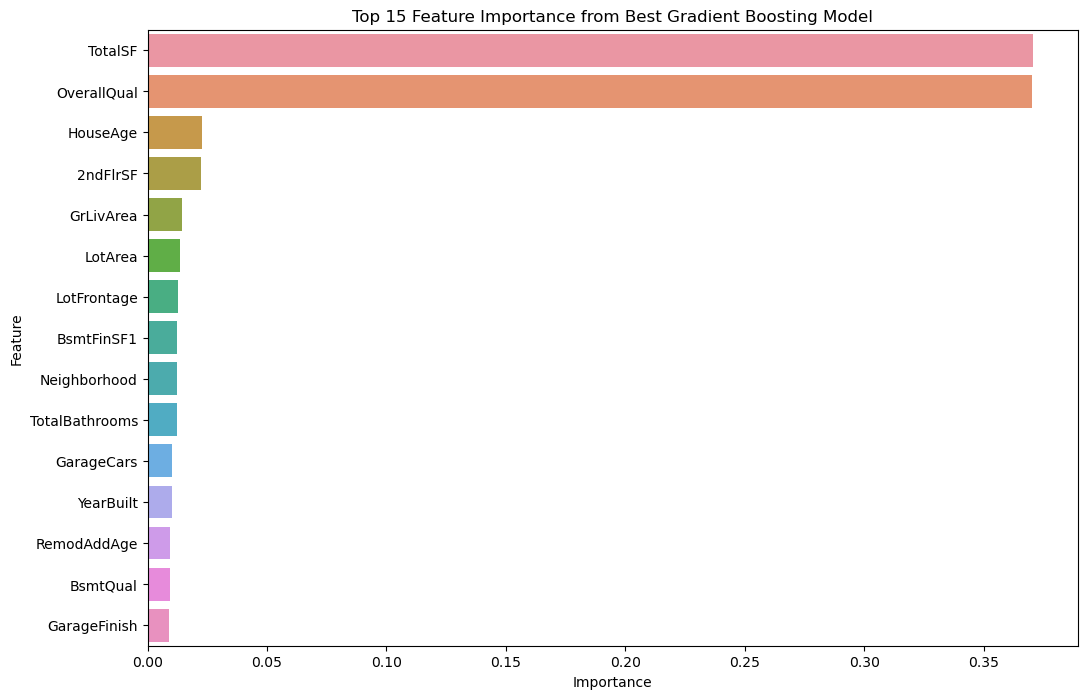

In [ ]:
# Plot feature importance for Gradient Boosting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb_df)
plt.title('Top 15 Feature Importance from Best Gradient Boosting Model')
plt.show()


In [ ]:
# feature importance in Random Forest
print(feature_importance_rf_df.head(15))

           Feature  Importance
82         TotalSF    0.406657
16     OverallQual    0.358296
43        2ndFlrSF    0.025523
18       YearBuilt    0.013834
79        HouseAge    0.012161
3          LotArea    0.012069
33      BsmtFinSF1    0.010926
45       GrLivArea    0.010836
81  TotalBathrooms    0.010424
60      GarageCars    0.009943
2      LotFrontage    0.009288
29        BsmtQual    0.008887
61      GarageArea    0.008502
11    Neighborhood    0.007987
52     KitchenQual    0.006958


In [ ]:
# Feature importance Gradient boosting
print(feature_importance_gb_df.head(15))

           Feature  Importance
82         TotalSF    0.370852
16     OverallQual    0.370395
79        HouseAge    0.022582
43        2ndFlrSF    0.022216
45       GrLivArea    0.014519
3          LotArea    0.013407
2      LotFrontage    0.012591
33      BsmtFinSF1    0.012341
11    Neighborhood    0.012197
81  TotalBathrooms    0.012182
60      GarageCars    0.010383
18       YearBuilt    0.010352
80     RemodAddAge    0.009309
29        BsmtQual    0.009211
59    GarageFinish    0.008777


## Lasso and Ridge Regressors

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# initialize the regressor 
lasso = Lasso(random_state=42)
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [ ]:
lasso_grid_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lasso_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

### Best parameters and score for Lasso Regressor

In [ ]:
print("Best parameters found by GridSearchCV for Lasso Regressor:")
print(lasso_grid_search.best_params_)
print("Best RMSE found by GridSearchCV for Lasso Regressor:")
best_rmse_lasso = np.sqrt(-lasso_grid_search.best_score_)
print(f"Best RMSE for Lasso: {best_rmse_lasso}")

Best parameters found by GridSearchCV for Lasso Regressor:
{'alpha': 100}
Best RMSE found by GridSearchCV for Lasso Regressor:
Best RMSE for Lasso: 20759.06508895022


### Evaluate the best Lasso model on the validation set

In [ ]:
best_lasso_model = lasso_grid_search.best_estimator_
y_pred_lasso_best = best_lasso_model.predict(X_val)
rmse_lasso_best = np.sqrt(mean_squared_error(y_val, y_pred_lasso_best))
r2_lasso_best = r2_score(y_val, y_pred_lasso_best)
print(f"Best Lasso Regressor RMSE on validation set: {rmse_lasso_best}")
print(f"Best Lasso Regressor R2 score on validation set: {r2_lasso_best}")

Best Lasso Regressor RMSE on validation set: 18984.930350289836
Best Lasso Regressor R2 score on validation set: 0.9101723535090092


### Best parameters and score for Ridge Regressor

In [ ]:
ridge = Ridge(random_state=42)
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [ ]:
# fit x_train and y_train
ridge_grid_search = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

### Best parameters and score for Ridge Regressor

In [ ]:
print(ridge_grid_search.best_params_)
print("Best RMSE found by GridSearchCV for Ridge Regressor:")
best_rmse_ridge = np.sqrt(-ridge_grid_search.best_score_)
print(f"Best RMSE for Ridge: {best_rmse_ridge}")

{'alpha': 100}
Best RMSE found by GridSearchCV for Ridge Regressor:
Best RMSE for Ridge: 20640.292608706863


### Evaluate the best Ridge model on the validation set

In [ ]:
best_ridge_model = ridge_grid_search.best_estimator_
y_pred_ridge_best = best_ridge_model.predict(X_val)
rmse_ridge_best = np.sqrt(mean_squared_error(y_val, y_pred_ridge_best))
r2_ridge_best = r2_score(y_val, y_pred_ridge_best)
print(f"Best Ridge Regressor RMSE on validation set: {rmse_ridge_best}")
print(f"Best Ridge Regressor R2 score on validation set: {r2_ridge_best}")

Best Ridge Regressor RMSE on validation set: 19118.804408469867
Best Ridge Regressor R2 score on validation set: 0.9089010302904009


#### The Lasso and Ridge models have a lower performance than the random forest, gradient boosting and xgb. 

### Predicting XGBoost Regressor on test set

In [ ]:
y_test_pred_xgb = xgb_grid_search.predict(test_features)
print(y_test_pred_gb)

[128683.25503915 159182.43291434 183329.63351499 ... 142531.44357172
 118700.70780798 232374.63964974]


## Use Principal Component Analysis to reduce dimensionality of features 

In [ ]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
features_pca = pca.fit_transform(features)
print(f"Number of components selected: {pca.n_components_}")

Number of components selected: 55


In [ ]:
# Split the data into training and validation sets
X = features_pca
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply PCA to the test set
test_features_pca = pca.transform(test_features)

In [ ]:
# Pipeline for Random Forest Regressor with PCA
rf_reg_pipeline_pca = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=200, random_state=42))])
rf_reg_pipeline_pca.fit(X_train, y_train)

Pipeline(steps=[('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [ ]:
# Evaluate Random Forest Regressor Model with PCA
y_pred_rf_pca = rf_reg_pipeline_pca.predict(X_val)
rmse_rf_pca = np.sqrt(mean_squared_error(y_val, y_pred_rf_pca))
mae_rf_pca = mean_absolute_error(y_val, y_pred_rf_pca)
r2_rf_pca = r2_score(y_val, y_pred_rf_pca)
print(f"Random Forest Regressor RMSE with PCA: {rmse_rf_pca}")
print(f"Random Forest Regressor MAE with PCA: {mae_rf_pca}")
print(f"Random Forest Regressor R2 score with PCA: {r2_rf_pca}")

Random Forest Regressor RMSE with PCA: 22273.51857471099
Random Forest Regressor MAE with PCA: 15054.92844827586
Random Forest Regressor R2 score with PCA: 0.8763569636175776


#### The PCA model performance is less than the other models although dimensionality has been reduced. 

In [ ]:
# Cross-Validation for Random Forest Regressor with PCA
cross_val_scores_rf_pca = cross_val_score(rf_reg_pipeline_pca, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv_rf_pca = np.sqrt(-cross_val_scores_rf_pca)
print(f"Cross-Validation RMSE for Random Forest Regressor with PCA: {rmse_cv_rf_pca.mean()} (std: {rmse_cv_rf_pca.std()})")

Cross-Validation RMSE for Random Forest Regressor with PCA: 22105.545077009556 (std: 636.6074423693353)


In [ ]:
# Ensure Random Forest model is fitted before predicting
if not hasattr(rf_reg_pipeline_pca, 'steps') or not hasattr(rf_reg_pipeline_pca.named_steps['model'], 'n_features_in_'):
    rf_reg_pipeline_pca.fit(X_train, y_train)

In [ ]:
# Predictions for Random Forest Regressor Model on Test Set with PCA
y_test_pred_rf_pca = rf_reg_pipeline_pca.predict(test_features_pca)
print("\nRandom Forest Regressor Predictions on Test Set:")
print(y_test_pred_rf_pca)


Random Forest Regressor Predictions on Test Set:
[127050.885 128554.945 185277.845 ... 195984.26  127714.585 233921.805]


## Models Analysis 
1. **Random Forest Regressor (without PCA)**
   - **Validation RMSE**: 18,725.64
   - **Validation R²**: 0.9126
   - **Cross-Validation RMSE**: 20,477.40 (std: 1,708.57)

2. **Gradient Boosting Regressor**
   - **Validation RMSE**: 18,286.33
   - **Validation R²**: 0.9167
   - **Mean Absolute Error (MAE)**: 12,641.36

3. **XGBoost Regressor**
   - **Validation RMSE**: 17,594.02
   - **Validation R²**: 0.9229
   - **MAE**: 12,568.12

4. **Lasso Regressor**
   - **Validation RMSE**: 18,984.93
   - **Validation R²**: 0.9102

5. **Ridge Regressor**
   - **Validation RMSE**: 19,118.80
   - **Validation R²**: 0.9089

6. **Random Forest Regressor (with PCA)**
   - **Validation RMSE**: 22,273.52
   - **Validation R²**: 0.8764
   - **Cross-Validation RMSE**: 22,105.55 (std: 636.61)

### Analysis
- **Best Performing Model**: 
  - **XGBoost Regressor** has the **lowest RMSE** (`17,594.02`) and **highest R² score** (`0.9229`) on the validation set, indicating that it is the best model in terms of accuracy and its ability to explain the variance in the target variable.
  - The **MAE** of the XGBoost model (`12,568.12`) is also lower than other models, indicating fewer significant prediction errors.

- **Random Forest Regressor (without PCA)**:
  - The **Random Forest model without PCA** performs well, with an RMSE of `18,725.64` and R² of `0.9126`. However, it does not outperform the XGBoost model.
  - **Cross-validation RMSE** is a bit higher (`20,477.40`), which indicates some variability in the model’s performance.

- **Random Forest Regressor (with PCA)**:
  - The performance **decreased** after applying PCA, with an RMSE of `22,273.52` and an R² of `0.8764`. This suggests that PCA might have removed important information, reducing the model's ability to capture the underlying patterns.
  - PCA did **reduce the standard deviation** (`636.61`), indicating more stable cross-validation results, but at the cost of lower accuracy.

- **Gradient Boosting Regressor**:
  - The Gradient Boosting model performed better than the Random Forest but not as well as XGBoost, with an RMSE of `18,286.33` and an R² of `0.9167`.

- **Lasso and Ridge Regressors**:
  - Both Lasso and Ridge models performed worse compared to the tree-based models, with higher RMSEs and lower R² scores. This indicates that the relationships in the data are non-linear, which linear models cannot capture effectively.


# Conclusion
- **Best Model**: The **XGBoost Regressor** is the best model based on the evaluation metrics.
- **PCA Impact**: Applying PCA led to a decrease in model performance for the Random Forest, indicating that dimensionality reduction may have discarded important information.
- **Tree-based Models**: The **tree-based models** (Random Forest, Gradient Boosting, XGBoost) perform better than linear models (Lasso, Ridge), likely because they can capture complex, non-linear relationships in the data.


In [ ]:
# Predictions for XGBoost Regressor Model on Test Set
y_test_pred_xgb = xgb_grid_search.best_estimator_.predict(test_features)

In [ ]:
# Prepare final submission DataFrame
if 'Id' in test_df.columns:
    test_ids = test_df['Id']
else:
    test_ids = range(1, len(test_features_pca) + 1)
submission_xgb = pd.DataFrame({'Id': test_ids, 'SalePrice': y_test_pred_xgb})
print(submission_xgb)

        Id      SalePrice
0        1  134196.703125
1        2  168288.562500
2        3  184890.718750
3        4  191527.562500
4        5  189012.156250
...    ...            ...
1454  1455   81498.281250
1455  1456   82917.859375
1456  1457  130211.031250
1457  1458  119569.093750
1458  1459  228278.703125

[1459 rows x 2 columns]


In [ ]:
# Save submission to CSV
submission_xgb.to_csv('xgboost_submission.csv', index=False)

# Visualization of Predicted vs Actual Sale Prices